In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns

%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
diabetes = sklearn.datasets.load_diabetes(as_frame=True)
# display(diabetes['data'])
# display(diabetes['target'])
# print(diabetes['DESCR'])
data, target = diabetes['data'], diabetes['target']
data['y'] = target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### pairplot just to pick the best columns for experiments

<IPython.core.display.Javascript object>


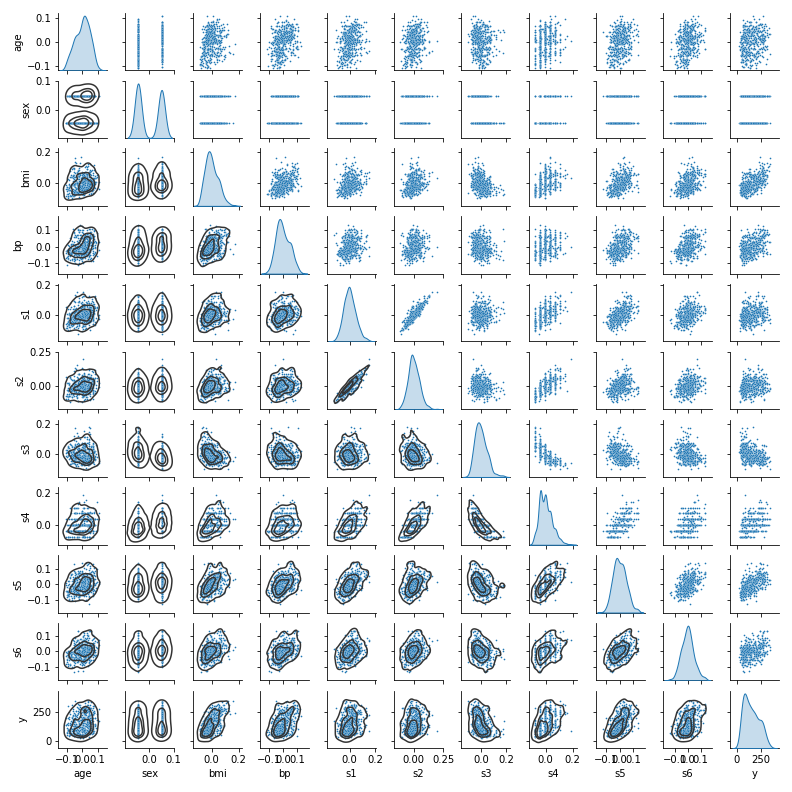

In [3]:
g = sns.pairplot(data, diag_kind="kde", height=1, 
                 plot_kws={"s": 3})
g.map_lower(sns.kdeplot, levels=4, color=".2")

### Pick **s1** as regressor and **s2** as response, claculate regression line with numpy

<IPython.core.display.Javascript object>


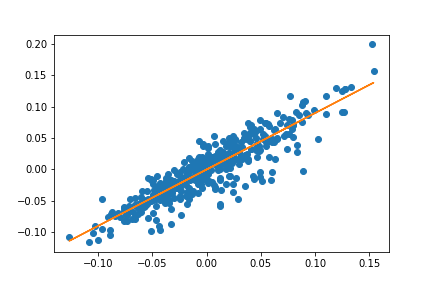

(0.8966629578104783, 2.0867381238186192e-16)

In [4]:
x = data['s1'].values
y = data['s2'].values

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x + b)
m, b

## ML estimation (model order 1)
- Assume normal distribution of error
- Assume x and d to be normalized (mean 0)?

$d=\mathbf{w}^T\mathbf{x}+\varepsilon$

$p_{\mathbf{W}|D,\mathbf{X}}(\mathbf{w}|d,\mathbf{x})=\dfrac{p_{D|\mathbf{W},\mathbf{X}}(d|\mathbf{w},\mathbf{x})p_{\mathbf{W}}(\mathbf{w})}{p_D(d)}$

$\pi(\mathbf{w}|d,\mathbf{x})\propto l(\mathbf{w}|d,\mathbf{x})\pi(\mathbf{w})$

$l(w|d_i,x_i)=p_E(\varepsilon_i)=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{\varepsilon_i^2}{2\sigma^2})=\dfrac{1}{\sqrt{2\pi}\sigma}exp(-\dfrac{1}{2\sigma^2}(d_i-w^Tx_i)^2)$
- exact value of $\sigma$ doesn't matter for $l$ maximization (ML)
- for MAP assumed ratio between $\sigma$ and $\sigma_w$ is important

$l(w|d,x)=\prod\limits_{i=1}^N l(w|d_i,x_i)$

### likelihood function plot and log plot

w 0.8799999999999999


<IPython.core.display.Javascript object>


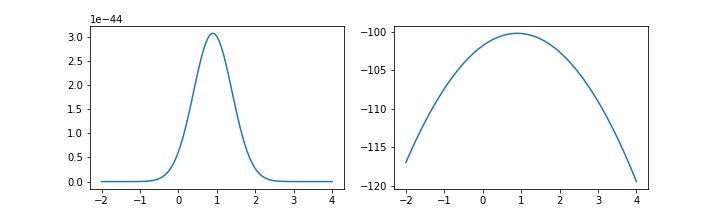

In [5]:
x = x
d = y
ws = np.linspace(-2, 4, 101)
sigma = 0.5
def calc_l(w):
    l = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(  -1/(2*sigma**2)*(d - w*x)**2  )
    return l.prod()

ls = [calc_l(w) for w in ws]
# display(ls)
print('w', ws[np.argmax(ls)])

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(ws, ls)
ax2.plot(ws, np.log(ls))

$\mathbf{w}_{\mathrm{ML}}=\arg \max\limits_{\mathbf{W}}l(\mathbf{w}|d,\mathbf{x})$

$\mathscr{E}(\mathbf{w})=\dfrac{1}{2}\sum\limits_{i=1}^N(d_i-\mathbf{w}^Tx_i)^2$

$\mathbf{w} = \arg \min \mathscr{E}(\mathbf{w})$

$\hat{\mathbf{w}}_{\mathrm{ML}}(N)=\hat{\mathbf{R}}^{-1}_{xx}(N)\hat{\mathbf{r}}_{dx}(N)$

In [6]:
R_xx = np.corrcoef(x)
R_xx_inv = 1/R_xx #np.linalg.inv(R_xx)
r_dx=np.corrcoef(x, d)[1,0]

w = R_xx_inv * r_dx
print(R_xx, r_dx)
print('w', w)

1.0 0.8966629578104902
w 0.8966629578104902


## ML estimation 2d; s1, s4 - regressors, s2 - response

<IPython.core.display.Javascript object>


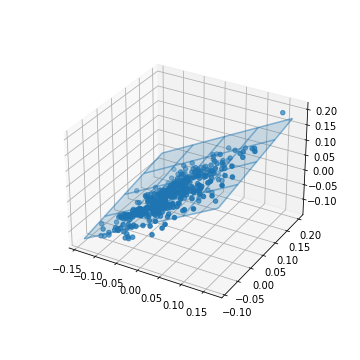

w [0.76330997 0.24594467]


In [7]:
x = data[['s1', 's4']].values
d = data['s2'].values
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111, projection='3d', navigate=True)
ax1.scatter(x[:,0], x[:,1], d)

w, *_ = np.linalg.lstsq(x, d, rcond=None)
print('w', w)

xlim, ylim, zlim = ax1.get_xlim(), ax1.get_ylim(), ax1.get_zlim()
xx, yy = np.meshgrid(np.linspace(*xlim, 5), np.linspace(*ylim, 5))
xxx = np.stack([xx.ravel(), yy.ravel()]).T
z = xxx @ w
ax1.plot_wireframe(xx, yy, z.reshape(xx.shape), alpha=0.5)
ax1.plot_surface(xx, yy, z.reshape(xx.shape), alpha=0.2)

In [8]:
xd = np.hstack([x, d.reshape(-1, 1)])
R_xd = np.corrcoef(xd, rowvar=False)
R_xx = R_xd[:R_xd.shape[0]-1, :R_xd.shape[1]-1]
r_dx = R_xd[:R_xd.shape[0]-1, R_xd.shape[1]-1]
print(R_xd)
print(R_xx, r_dx)
R_xx_inv = np.linalg.inv(R_xx)

w = R_xx_inv @ r_dx
print('w', w)

[[1.         0.54220728 0.89666296]
 [0.54220728 1.         0.65981689]
 [0.89666296 0.65981689 1.        ]]
[[1.         0.54220728]
 [0.54220728 1.        ]] [0.89666296 0.65981689]
w [0.76330997 0.24594467]


# MAP estimation, $M=2$
- $\mathbf{w}_{\mathrm{MAP}}=\arg \max\limits_{\mathbf{W}}\pi(\mathbf{w}|d,\mathbf{x})$
- $\mathscr{E}(\mathbf{w})=\dfrac{1}{2}\sum\limits_{i=1}^N(d_i-\mathbf{w}^Tx_i)^2+\dfrac{\lambda}{2}\|\mathbf{w}\|^2$

- $\lambda = \dfrac{\sigma^2}{\sigma_w^2}$
- $\hat{\mathbf{w}}_{\mathrm{MAP}}(N)=[\mathbf{R}_{xx}(N)+\lambda\mathbf{I}]^{-1}\mathbf{r}_{dx}(N)$


w [0.62672859 0.26666674]


<IPython.core.display.Javascript object>


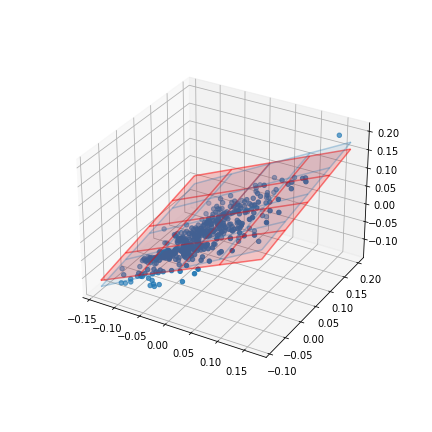

In [9]:
lambd = 0.2

xd = np.hstack([x, d.reshape(-1, 1)])
R_xd = np.corrcoef(xd, rowvar=False)
R_xx = R_xd[:R_xd.shape[0]-1, :R_xd.shape[1]-1]
r_dx = R_xd[:R_xd.shape[0]-1, R_xd.shape[1]-1]
inv = np.linalg.inv(R_xx + lambd*np.identity(R_xx.shape[0]))
w_map = inv @ r_dx
print('w', w_map)

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111, projection='3d', navigate=True)
ax1.scatter(x[:,0], x[:,1], d)

xlim, ylim, zlim = ax1.get_xlim(), ax1.get_ylim(), ax1.get_zlim()
xx, yy = np.meshgrid(np.linspace(*xlim, 5), np.linspace(*ylim, 5))
xxx = np.stack([xx.ravel(), yy.ravel()]).T
z_map = xxx @ w_map
ax1.plot_wireframe(xx, yy, z_map.reshape(xx.shape), alpha=0.5, color='#f00')
ax1.plot_surface(xx, yy, z_map.reshape(xx.shape), alpha=0.2, color='#f00')

ax1.plot_wireframe(xx, yy, z.reshape(xx.shape), alpha=0.3)
ax1.plot_surface(xx, yy, z.reshape(xx.shape), alpha=0.1)

- $\pi(\mathbf{w}|d,\mathbf{x})\propto l(\mathbf{w}|d,\mathbf{x})\pi(\mathbf{w}) = exp[-\dfrac{1}{2\sigma^2} \sum\limits_{i=1}^N(d_i-w^Tx_i)^2 - \dfrac{1}{2\sigma_w^2}\|w\|^2]$

w [0.63636364 0.27272727]


<IPython.core.display.Javascript object>


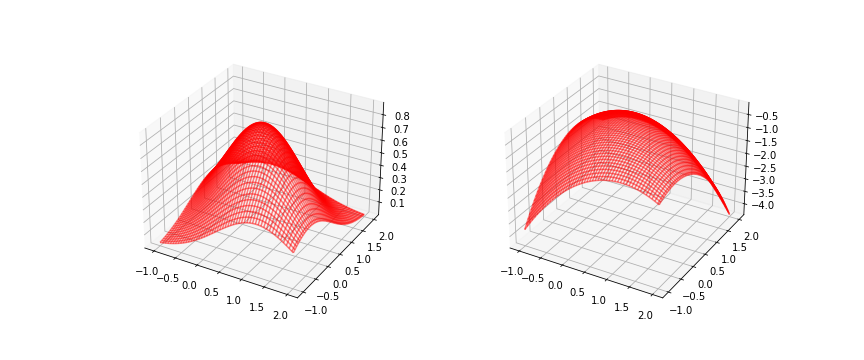

In [10]:
w1s, w2s = np.meshgrid(np.linspace(-1, 2, 100), np.linspace(-1, 2, 100))
# sigma_err = 0.5
# sigma_w = 0.5
def calc_l_pi(w):
    l = -1/2*((d - x @ w)**2).sum()
    pi = -lambd/2*(w @ w)
    l_pi = np.exp(l+pi)
    return l_pi

ws = np.stack([w1s.ravel(), w2s.ravel()]).T
# print(ws)
ls = np.array([calc_l_pi(w) for w in ws])
# display(ls)
print('w', ws[np.argmax(ls)])

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_wireframe(w1s, w2s, ls.reshape(w1s.shape), alpha=0.5, color='#f00')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_wireframe(w1s, w2s, np.log(ls).reshape(w1s.shape), alpha=0.5, color='#f00')